* ##############################################
* ######### 상권정보데이터 분석하기 ######### 
* ##############################################

In [1]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt

import seaborn as sns
print('seaborn', sns.__version__)

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# figure에 한글 폰트 사용을 위한 코드
plt.rc("font", family="Malgun Gothic") # window
#plt.rc("font", family="AppleGothic") # mac
from matplotlib.ticker import MaxNLocator

python 3.12.5 (tags/v3.12.5:ff3bc82, Aug  6 2024, 20:45:27) [MSC v.1940 64 bit (AMD64)]
numpy 2.2.6
pandas 2.2.3
matplotlib 3.10.3
seaborn 0.13.2


# 상권정보 데이터 경로
* 데이터 출처 : [공공데이터포털](https://www.data.go.kr/dataset/15012005/fileData.do)

# 데이터 로드

In [2]:
df=pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_부산_202403.csv', sep=',')
df.head(1)
df.shape

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17020\531527311.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_부산_202403.csv', sep=',')


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0072343,선해횟집,NaN,I2,음식,I201,한식,I20111,횟집,I56111,...,2641011100100300027023409,NaN,부산광역시 금정구 사천로3번길 2,609808,46264,NaN,1,NaN,129.113321,35.223363


(147295, 39)

# 데이터 탐색

In [3]:
df.index # index
len(df.index)
df.columns # columns
len(df.columns)

RangeIndex(start=0, stop=147295, step=1)

147295

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

39

In [4]:
df.iloc[0]

상가업소번호            MA0101202210A0072343
상호명                               선해횟집
지점명                                NaN
상권업종대분류코드                           I2
상권업종대분류명                            음식
상권업종중분류코드                         I201
상권업종중분류명                            한식
상권업종소분류코드                       I20111
상권업종소분류명                            횟집
표준산업분류코드                        I56111
표준산업분류명                     한식 일반 음식점업
시도코드                                26
시도명                              부산광역시
시군구코드                            26410
시군구명                               금정구
행정동코드                         26410555
행정동명                             금사회동동
법정동코드                       2641011100
법정동명                               금사동
지번코드               2641011100100300027
대지구분코드                               1
대지구분명                               대지
지번본번지                             30.0
지번부번지                             27.0
지번주소               부산광역시 금정구 금사동 30-27
도로명코드                    

In [5]:
df['상권업종대분류명'].value_counts()
df['대지구분명'].value_counts()

상권업종대분류명
음식         51691
소매         37563
수리·개인      18681
과학·기술      12191
교육          6329
부동산         5752
예술·스포츠      5621
시설관리·임대     5209
숙박          2241
보건의료        2017
Name: count, dtype: int64

대지구분명
대지    146871
산        424
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147295 entries, 0 to 147294
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     147295 non-null  object 
 1   상호명        147294 non-null  object 
 2   지점명        3057 non-null    object 
 3   상권업종대분류코드  147295 non-null  object 
 4   상권업종대분류명   147295 non-null  object 
 5   상권업종중분류코드  147295 non-null  object 
 6   상권업종중분류명   147295 non-null  object 
 7   상권업종소분류코드  147295 non-null  object 
 8   상권업종소분류명   147295 non-null  object 
 9   표준산업분류코드   147260 non-null  object 
 10  표준산업분류명    147260 non-null  object 
 11  시도코드       147295 non-null  int64  
 12  시도명        147295 non-null  object 
 13  시군구코드      147295 non-null  int64  
 14  시군구명       147295 non-null  object 
 15  행정동코드      147295 non-null  int64  
 16  행정동명       147295 non-null  object 
 17  법정동코드      147295 non-null  int64  
 18  법정동명       147295 non-null  object 
 19  지번코드       147295 non-n

# (보충내용) series에 seaborn barplot 적용하기

<Axes: xlabel='group1', ylabel='score'>

group1
A     4.5
B    15.1
C    20.8
Name: score, dtype: float64

<Axes: xlabel='group1', ylabel='score'>

<Axes: xlabel='group1'>

<Axes: xlabel='score', ylabel='group1'>

<Axes: ylabel='group1'>

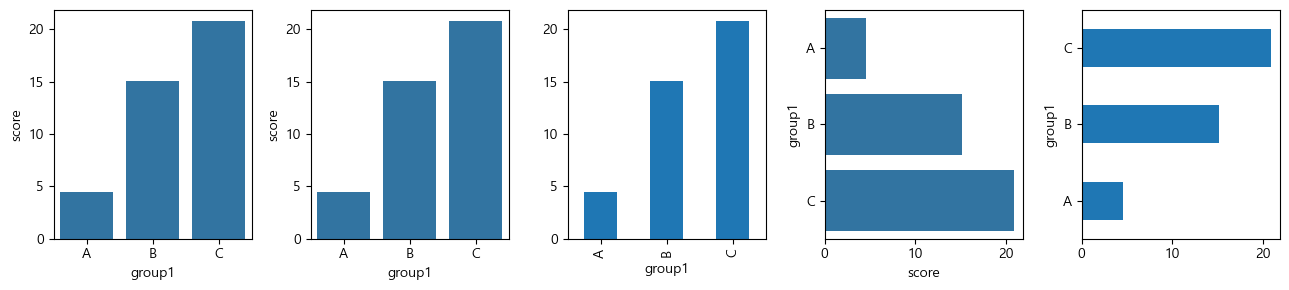

In [7]:
fig=plt.figure(figsize=(13,3), dpi=100)
ax1, ax2, ax3, ax4, ax5=fig.subplots(1,5)

df1=pd.DataFrame({'group1':['A']*10+['B']*7+['C']*2+['B']*3+['C']*3, 'score':range(25)})

## ax1
sns.barplot(data=df1, x='group1', y='score', errorbar=None, ax=ax1)


#### ax2~ax5 활용
sr1=df1.groupby('group1')['score'].mean()
sr1

## ax2
sns.barplot(data=sr1, ax=ax2) #seaborn 0.13.x
#sns.barplot(x=sr1.index, y=sr1.values, ax=ax2) #seaborn 0.12.x

# ## ax3
sr1.plot.bar(ax=ax3)

# ## ax4
sns.barplot(data=sr1, ax=ax4, orient='h') #seaborn 0.13.x
#sns.barplot(y=sr1.index, x=sr1.values, ax=ax4) #seaborn 0.12.x

# ## ax5
sr1.plot.barh(ax=ax5)

fig.tight_layout()

# (보충내용)dataframe에 seaborn barplot 적용하기

,A,B,C,D
Id1,1,4,7,10
Id2,2,5,8,11
Id3,3,6,9,12


,index,A,B,C,D
0,Id1,1,4,7,10
1,Id2,2,5,8,11
2,Id3,3,6,9,12


,index,variable,value
0,Id1,A,1
1,Id2,A,2
2,Id3,A,3
3,Id1,B,4
4,Id2,B,5
5,Id3,B,6
6,Id1,C,7
7,Id2,C,8
8,Id3,C,9
9,Id1,D,10


<Axes: xlabel='index', ylabel='value'>

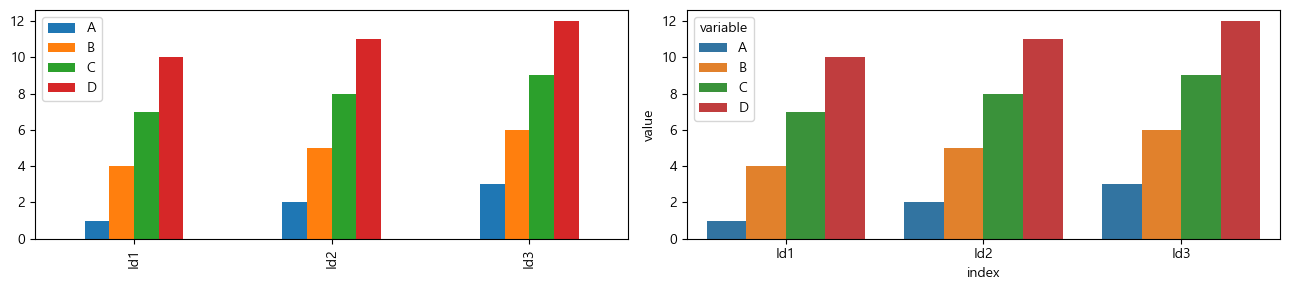

In [8]:
fig=plt.figure(figsize=(13,3), dpi=100)
ax1, ax2=fig.subplots(1,2)

df1=pd.DataFrame({'A':[1,2,3],'B': [4,5,6], 'C':[7,8,9], 'D':[10,11,12]}, index=['Id1','Id2','Id3'])
df1

## ax1
_=df1.plot.bar(ax=ax1)

## ax2
df2=df1.reset_index()
df2
df3=df2.melt(id_vars='index')
df3
sns.barplot(data=df3,x='index', hue='variable', y='value')

fig.tight_layout()

# (실습1) 결측치 개수 bargraph로 나타내기
* 각 column 별 결측치의 %를 bar graph로 나타내시오
* ax1) pandas plot 사용
* as2) seaborn 사용

<Axes: >

<Axes: >

Text(0.5, 0, '(%)')

Text(0.5, 0, '(%)')

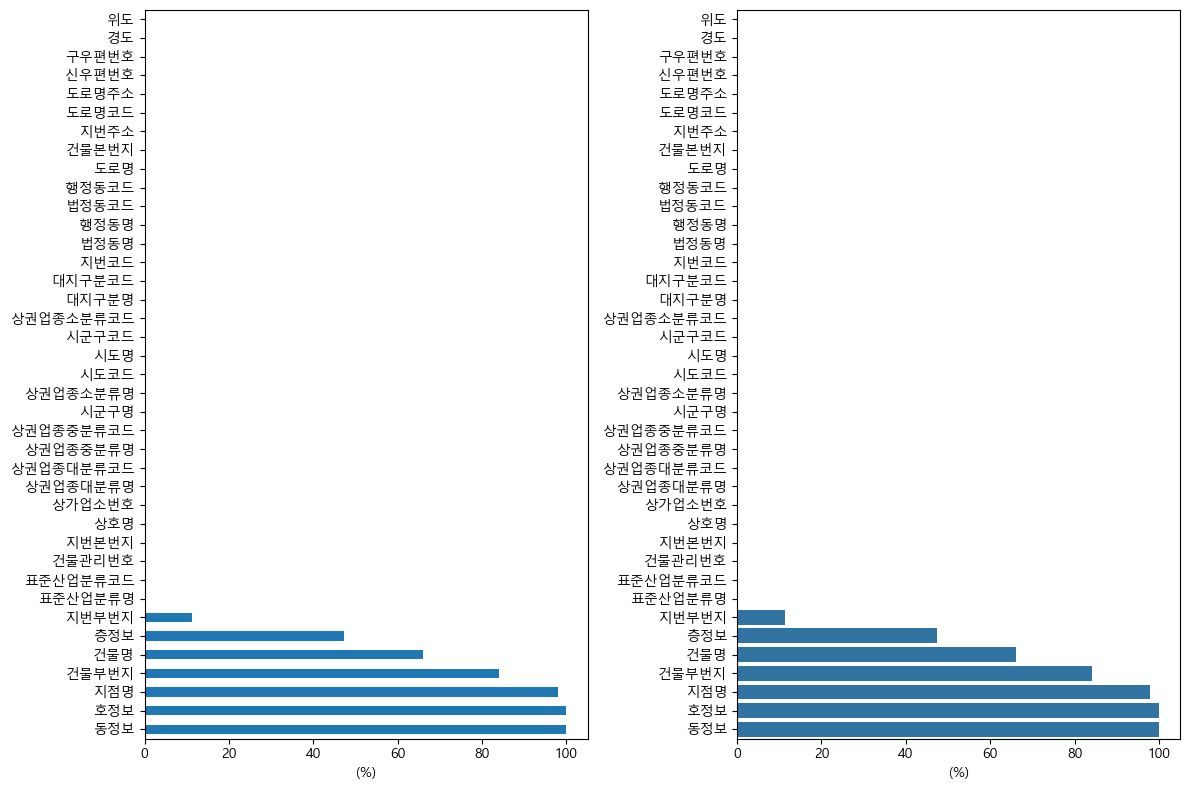

In [9]:
fig=plt.figure(figsize=(12,8), dpi=100)
ax1, ax2=fig.subplots(1,2)

## 코드작성 (ax1)
n1 = df.isnull().sum(axis=0).sort_values(ascending=False)
n2=(n1/len(df))*100
n2.plot.barh(ax=ax1)
## 코드작성 끝


## 코드작성 (ax2)
n2=n2.iloc[::-1]
sns.barplot(data=n2, orient='h', ax=ax2)#seaborn 0.13.x
#sns.barplot(y=n2.index, x=n2.values, orient='h', ax=ax2)#seaborn 0.12.x


## 코드작성 끝

ax1.set_xlabel("(%)")
ax2.set_xlabel("(%)")

fig.tight_layout()

# (실습2) 분석에 사용하지 않은 컬럼 제거
* 1) 결측치가 전체 데이터의 수의 5% 이상인 column 제거
* 2) column이름에 "번호" 또는 "코드"가 포함되어 있는 column 제거 (단 상가업소번호는 포함)

In [11]:
df=pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_부산_202403.csv', sep=',')

print("# 1) 결측치가 전체 데이터의 수의 5% 이상인 column 제거")
## 코드작성 ##
n1 = df.isnull().sum(axis=0).sort_values(ascending=False)
n2=(n1/len(df))*100
n3=n2.loc[n2>5]
n3

not_use_col = n3.index
df2 = df.drop(columns=not_use_col)
## 코드작성 끝 ##
df2.shape


print("# 2) column이름에 '번호' 또는 '코드'가 포함되어 있는 column 제거  (단 상가업소번호는 포함)")
## 코드작성 ##
cols = df2.columns
cols_code = cols[(cols.str.contains("코드|번호"))&(cols!='상가업소번호')]
cols_code
dfs = df2.drop(columns=cols_code)
## 코드작성 끝 ##
dfs.shape

# 1) 결측치가 전체 데이터의 수의 5% 이상인 column 제거


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17020\1939665267.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_부산_202403.csv', sep=',')


동정보      100.000000
호정보      100.000000
지점명       97.924573
건물부번지     84.129129
건물명       66.074205
층정보       47.335619
지번부번지     11.350691
dtype: float64

(147295, 32)

# 2) column이름에 '번호' 또는 '코드'가 포함되어 있는 column 제거  (단 상가업소번호는 포함)


Index(['상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '표준산업분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

(147295, 18)

# (실습3) 아래 주어진 dfs로 부터 특정 데이터 가져오기

In [12]:
## 데이터 로드 & 전처리

## step1: 결측치가 전체 데이터의 수의 5% 이상인 column 제거
df=pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_부산_202403.csv', sep=',')
n1 = df.isnull().sum(axis=0).sort_values(ascending=False)
n2=(n1/len(df))*100
n3=n2.loc[n2>5]
df2 = df.drop(columns=n3.index)

## step2: column이름에 '번호' 또는 '코드'가 포함되어 있는 column 제거  (단 상가업소번호는 포함)
cols = df2.columns
cols_code = cols[(cols.str.contains("코드|번호"))&(cols!='상가업소번호')]
dfs = df2.drop(columns=cols_code)

## data 확인
dfs.head(1)
dfs.shape

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17020\3165844445.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_부산_202403.csv', sep=',')


,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,MA0101202210A0072343,선해횟집,음식,한식,횟집,한식 일반 음식점업,부산광역시,금정구,금사회동동,금사동,대지,30.0,부산광역시 금정구 금사동 30-27,부산광역시 금정구 사천로3번길,2,부산광역시 금정구 사천로3번길 2,129.113321,35.223363


(147295, 18)

In [13]:
print("# 1) 상호명, 시도명, 시군구명, 도로명주소 정보만 가져오기")
#=== 코드작성 ===#
df4=dfs[['상호명','시도명','시군구명','도로명주소']]
#=== 코드작성 끝 ===#
df4

# 1) 상호명, 시도명, 시군구명, 도로명주소 정보만 가져오기


,상호명,시도명,시군구명,도로명주소
0,선해횟집,부산광역시,금정구,부산광역시 금정구 사천로3번길 2
1,미즈노,부산광역시,해운대구,부산광역시 해운대구 센텀남대로 59
2,리스트,부산광역시,강서구,부산광역시 강서구 명지국제6로 168
3,눈썹그리기교실동안눈썹,부산광역시,북구,부산광역시 북구 화명대로 31
4,안심공인중개사무소,부산광역시,연제구,부산광역시 연제구 연안로13번길 85
...,...,...,...,...
147290,용공장,부산광역시,기장군,부산광역시 기장군 기장읍 차성로390번길 23
147291,유미노래방,부산광역시,금정구,부산광역시 금정구 서동로176번길 14-2
147292,큰집밀양순대돼지국밥,부산광역시,동구,부산광역시 동구 중앙대로231번길 5
147293,바르미부산,부산광역시,부산진구,부산광역시 부산진구 가야대로 772


In [14]:
print("# 2) 상호명이 '프로포즈'인 상점 가져오기")
#=== 코드작성 ===#
df4=dfs.loc[(dfs['상호명']=='프로포즈')]
#=== 코드작성 끝 ===#
df4

# 2) 상호명이 '프로포즈'인 상점 가져오기


,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
39515,MA010120220810602371,프로포즈,소매,시계·귀금속 소매,시계/귀금속 소매업,시계 및 귀금속 소매업,부산광역시,부산진구,부전2동,부전동,대지,573.0,부산광역시 부산진구 부전동 573-1,부산광역시 부산진구 중앙대로,717,부산광역시 부산진구 중앙대로 717,129.059161,35.155254
56821,MA010120220810794879,프로포즈,수리·개인,이용·미용,미용실,두발 미용업,부산광역시,동래구,명장2동,명장동,대지,506.0,부산광역시 동래구 명장동 506-9,부산광역시 동래구 명서로130번길,1,부산광역시 동래구 명서로130번길 1-1,129.101047,35.210820
59291,MA010120220810727357,프로포즈,소매,시계·귀금속 소매,시계/귀금속 소매업,시계 및 귀금속 소매업,부산광역시,금정구,장전2동,장전동,대지,643.0,부산광역시 금정구 장전동 643-89,부산광역시 금정구 금정로60번길,48,부산광역시 금정구 금정로60번길 48,129.088959,35.229219
117293,MA010120220803864266,프로포즈,음식,주점,생맥주 전문,생맥주 전문점,부산광역시,동래구,안락1동,안락동,대지,426.0,부산광역시 동래구 안락동 426-40,부산광역시 동래구 반송로,232,부산광역시 동래구 반송로 232,129.098733,35.201287


In [15]:
print("# 3) 시군구명이 '해운대구'이고 상호명이 '아가방'인 상점 가져오기")
#=== 코드작성 ===#
df4=dfs.loc[(dfs['상호명']=='아가방')&(dfs['시군구명']=='해운대구')]
#=== 코드작성 끝 ===#
df4

# 3) 시군구명이 '해운대구'이고 상호명이 '아가방'인 상점 가져오기


,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
85380,MA010120220812388828,아가방,소매,섬유·의복·신발 소매,기타 의류 소매업,속옷 및 잠옷 소매업,부산광역시,해운대구,좌1동,좌동,대지,1467.0,부산광역시 해운대구 좌동 1467-4,부산광역시 해운대구 해운대로,813,부산광역시 해운대구 해운대로 813,129.177094,35.170597


# 4) 위도 histogram을 그리고, 위도 '35.07' 이하인 상점들이 속해있는 시군구명의 개수를 출력하시오


<Axes: ylabel='Frequency'>

시군구명
사하구    1713
영도구     259
강서구     203
서구       67
Name: count, dtype: int64

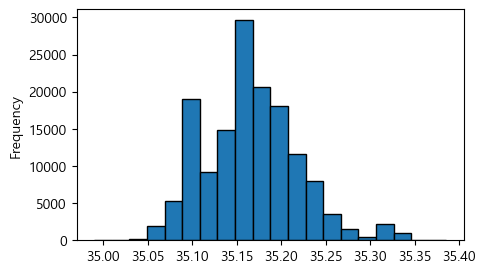

In [17]:
print("# 4) 위도 histogram을 그리고, 위도 '35.07' 이하인 상점들이 속해있는 시군구명의 개수를 출력하시오")

fig=plt.figure(figsize=(5,3), dpi=100)
ax1=fig.subplots()

#=== 코드작성 ===#
dfs['위도'].plot.hist(ax=ax1, bins=20, edgecolor='k')
df4=dfs.loc[(dfs['위도']<=35.07)]
df4['시군구명'].value_counts()
#=== 코드작성 끝 ===#

In [18]:
print("# 5) 가장 동쪽에 있는 '상호명', '시도명', '경도' 가져오기")

#=== 코드작성 ===#
max_long=dfs['경도'].max()
max_long

sr1=dfs.loc[dfs['경도']==max_long,['상호명', '시도명', '경도']]
#=== 코드작성 끝 ===#

sr1

# 5) 가장 동쪽에 있는 '상호명', '시도명', '경도' 가져오기


np.float64(129.294090409964)

,상호명,시도명,경도
4887,1발전소매점,부산광역시,129.29409
74976,한전케이피에스고리3사업소,부산광역시,129.29409


In [19]:
print("# 6) 해운대구의 상점 중, 상호명에 '태권도'가 포함되어있는 상점들의 (상호명) 정보 가져오기")

# ++++++++ contains결과를 boolean index로 사용시 nan 유의

#=== 코드작성 ===#
sr6=dfs.loc[(dfs['시군구명']=='해운대구')&(dfs['상호명'].str.contains('태권도')), '상호명']
sr6
#=== 코드작성 끝 #

# 6) 해운대구의 상점 중, 상호명에 '태권도'가 포함되어있는 상점들의 (상호명) 정보 가져오기


27246         부산TIA태권도
88640          마스터홍태권도
94045           사자후태권도
96546          자이언트태권도
111350      아리랑멋제일태권도장
142752    TOPCLASS태권도2
144377        베스트성빈태권도
Name: 상호명, dtype: object

# 크기가 다른 axes 만들기

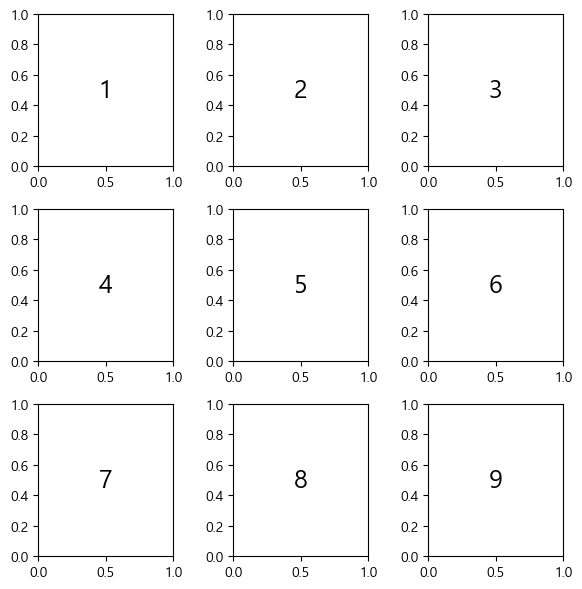

In [20]:
fig=plt.figure(figsize=(6,6), dpi=100)
axs=fig.subplots(3,3).flatten()

for ax, ii in zip(axs, range(1,10)):
    _=ax.text(0.5,0.5,ii, ha='center', va='center', fontsize=18)
    
fig.tight_layout()

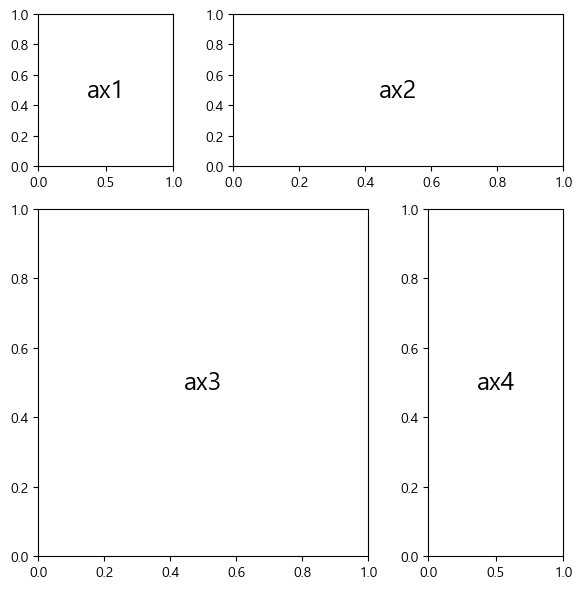

In [21]:
fig=plt.figure(figsize=(6,6), dpi=100)
ax1=fig.add_subplot(3,3,1)
ax2=fig.add_subplot(3,3,(2,3))
ax3=fig.add_subplot(3,3,(4,8))
ax4=fig.add_subplot(3,3,(6,9))

for ax, ax_num in zip([ax1, ax2, ax3, ax4], ['ax1', 'ax2', 'ax3', 'ax4']):
    _=ax.text(0.5,0.5,ax_num, ha='center', va='center', fontsize=18)
    
fig.tight_layout()

# (실습4) 부산에는 어떤 종류의 상점이 제일 많을까? bargraph로 나타내시오

In [23]:
## 데이터 로드 & 전처리

## step1: 결측치가 전체 데이터의 수의 5% 이상인 column 제거
df=pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_부산_202403.csv', sep=',')
n1 = df.isnull().sum(axis=0).sort_values(ascending=False)
n2=(n1/len(df))*100
n3=n2.loc[n2>5]
df2 = df.drop(columns=n3.index)

## step2: column이름에 '번호' 또는 '코드'가 포함되어 있는 column 제거  (단 상가업소번호는 포함)
cols = df2.columns
cols_code = cols[(cols.str.contains("코드|번호"))&(cols!='상가업소번호')]
dfs = df2.drop(columns=cols_code)

## data 확인
dfs.shape

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17020\1742466000.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_부산_202403.csv', sep=',')


(147295, 18)

* ax1) 상점수가 가장 많은 대분류 Top5의 상점수 bar graph
* ax2) 상점수가 가장 많은 중분류 Top5의 상점수 bar graph
* ax3) 상점수가 가장 많은 소분류 Top5의 상점수 bar graph (sns.countplot 사용)
* ax4) 각 대분류 별 중분류 가짓수 (상점수가 아님) 를 bar로 시각화 (중분류 리스트를 담은 series는 따로 출력) 
* ax5) 각 대분류 별 상점수가 가장 많은 중분류 Top3의 상점수 bar grapth

'###################### ax1'

상권업종대분류명
음식         51691
소매         37562
수리·개인      18681
과학·기술      12191
교육          6329
부동산         5752
예술·스포츠      5621
시설관리·임대     5209
숙박          2241
보건의료        2017
Name: 상호명, dtype: int64

'###################### ax2'

상권업종중분류명
한식                  음식
섬유·의복·신발 소매         소매
이용·미용            수리·개인
부동산 서비스            부동산
의약·화장품 소매           소매
                ...   
통신장비 수리          수리·개인
모터사이클 소매            소매
기타 개인            수리·개인
조경·유지          시설관리·임대
시장 조사            과학·기술
Name: 상권업종대분류명, Length: 74, dtype: object

'###################### ax3'

'###################### ax4'

상권업종대분류명
소매         21
과학·기술      11
수리·개인      11
시설관리·임대    10
음식          9
교육          3
예술·스포츠      3
보건의료        3
숙박          2
부동산         1
Name: 상권업종중분류명, dtype: int64

'###################### ax5'

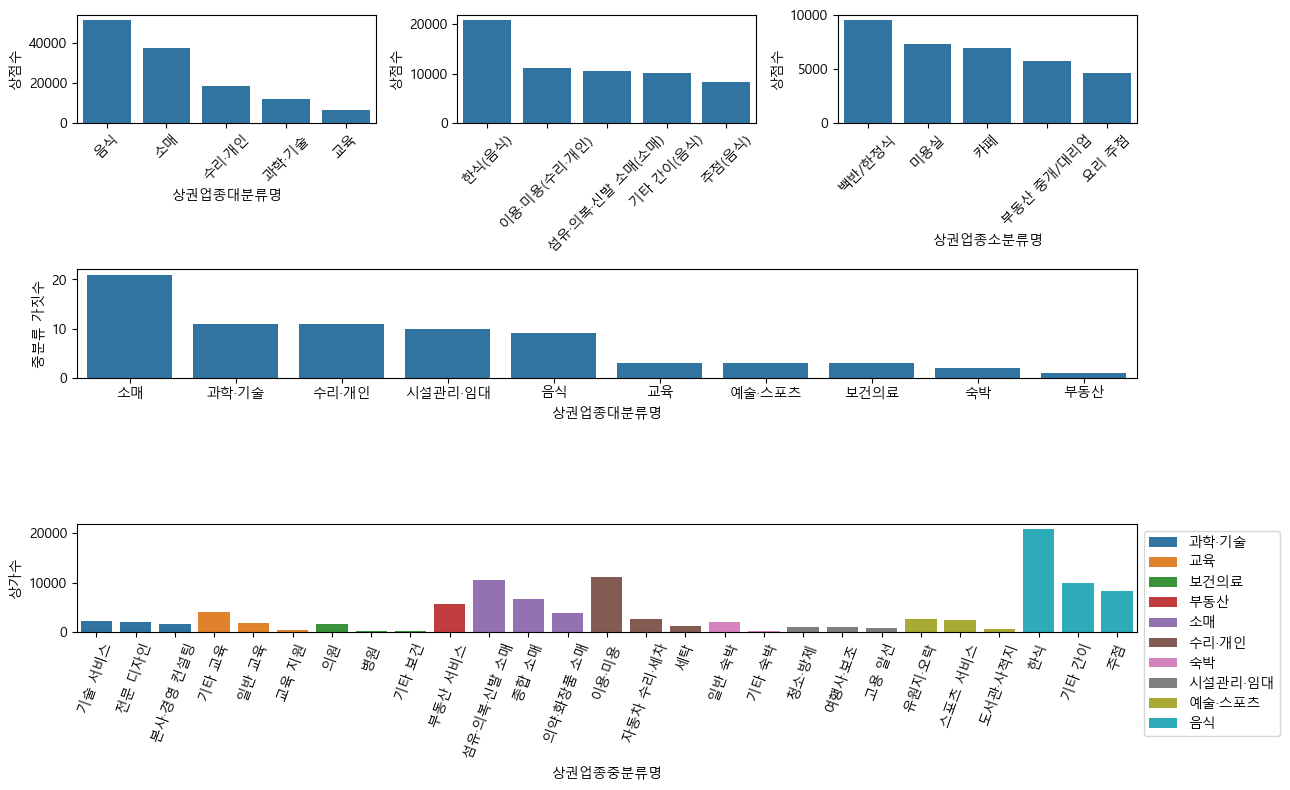

In [31]:
###################################
fig=plt.figure(figsize=(13,8), dpi=100)
ax1=fig.add_subplot(3,3,1)
ax2=fig.add_subplot(3,3,2)
ax3=fig.add_subplot(3,3,3)
ax4=fig.add_subplot(3,3,(4,6))
ax5=fig.add_subplot(3,3,(7,9))

## ax1
'###################### ax1'
sr1=dfs['상권업종대분류명'].value_counts() # 방법 1: value_counts (sorting 됨)
#sr1
sr1=dfs.groupby(['상권업종대분류명'])['상호명'].count().sort_values(ascending=False) # 방법 2: groupby (sorting 따로 해야 함)
#sr1
sr1=dfs.pivot_table(index='상권업종대분류명', values='상호명', aggfunc='count').sort_values(by='상호명',ascending=False) # 방법 3: pivot_table (sorting 따로 해야 함)
sr1=sr1['상호명']
sr1

_=sns.barplot(sr1.head(5), ax=ax1)
_=ax1.tick_params(axis='x', rotation=45)
_=ax1.set_ylabel('상점수')
## ax2
'###################### ax2'
## 코드작성
sr2=dfs['상권업종중분류명'].value_counts()
name_dic_sr=dfs[['상권업종대분류명','상권업종중분류명']].drop_duplicates().set_index('상권업종중분류명')['상권업종대분류명']
name_dic_sr
sr2_top5=sr2.head(5)
sr2_top5.index=['{}({})'.format(n1,name_dic_sr[n1]) for n1 in sr2_top5.index]

_=sns.barplot(sr2_top5, ax=ax2)
_=ax2.tick_params(axis='x', rotation=45)
_=ax2.set_ylabel('상점수')

## ax3 (sns countplot 사용)
'###################### ax3'
## 코드작성
_=sns.countplot(data=dfs,
               x='상권업종소분류명',
               ax=ax3,
               order=dfs['상권업종소분류명'].value_counts().iloc[:5].index)
_=ax3.tick_params(axis='x', rotation=45)
_=ax3.set_ylabel('상점수')

## ax4
'###################### ax4'
## 코드작성
sr4 = dfs.groupby('상권업종대분류명')['상권업종중분류명'].nunique().sort_values(ascending=False)
sr4
_=sns.barplot(data=sr4, ax=ax4)
_=ax4.set_ylabel('중분류 가짓수')

## ax5
'###################### ax5'
## 코드작성
df1=dfs.groupby(['상권업종대분류명','상권업종중분류명'])['상가업소번호'].nunique().reset_index()
df1.rename(columns={'상가업소번호': '상가수'}, inplace=True)
df2=df1.sort_values(['상권업종대분류명', '상가수'], ascending=[True, False])
df3 = df2.groupby('상권업종대분류명').head(3)
_=sns.barplot(data=df3, x='상권업종중분류명',y='상가수',hue='상권업종대분류명', ax=ax5)
_=ax5.tick_params(axis='x', labelrotation=70)
_=ax5.legend(bbox_to_anchor=(1,1), loc='upper left')

fig.tight_layout()

# ===> 서울부산 데이터 로드

In [32]:
## 데이터 로드 & 전처리

df=pd.read_csv('data/상가정보_서울부산_sampled.csv', sep=',') # 원래 데이터에서 1/3 씩 랜덤하게 샘플링함
## step1: 결측치가 전체 데이터의 수의 5% 이상인 column 제거
n1 = df.isnull().sum(axis=0).sort_values(ascending=False)
n2=(n1/len(df))*100
n3=n2.loc[n2>5]
df2 = df.drop(columns=n3.index)

## step2: column이름에 '번호' 또는 '코드'가 포함되어 있는 column 제거  (단 상가업소번호는 포함)
cols = df2.columns
cols_code = cols[(cols.str.contains("코드|번호"))&(cols!='상가업소번호')]
dfs = df2.drop(columns=cols_code)

## data 확인
dfs.head(1)
dfs.shape

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,MA0106202307A0467187,츠키요와,음식,일식,일식 회/초밥,일식 음식점업,서울특별시,강남구,청담동,청담동,대지,83.0,서울특별시 강남구 청담동 83-17,서울특별시 강남구 선릉로158길,13.0,서울특별시 강남구 선릉로158길 13-12,127.041457,37.526122


(207510, 18)

# (실습5) 시도 별로 각 대분류 속한 상점수 시각화

Text(0.5, 1.0, '시도 별로 각 대분류 속한 상점수 (sns.countplot)')

Text(0.5, 1.0, '시도 별로 각 대분류 속한 상점수 (sns.barplot)')

Text(0.5, 1.0, '시도 별로 각 대분류 속한 상점수 (sns.pointplot)')

,상권업종대분류명,시도명,상점수
0,음식,서울특별시,44114
1,소매,서울특별시,33929
2,과학·기술,서울특별시,29281
3,음식,부산광역시,17246
4,수리·개인,서울특별시,15828
5,소매,부산광역시,12592
6,교육,서울특별시,8931
7,부동산,서울특별시,8107
8,시설관리·임대,서울특별시,7275
9,예술·스포츠,서울특별시,6247


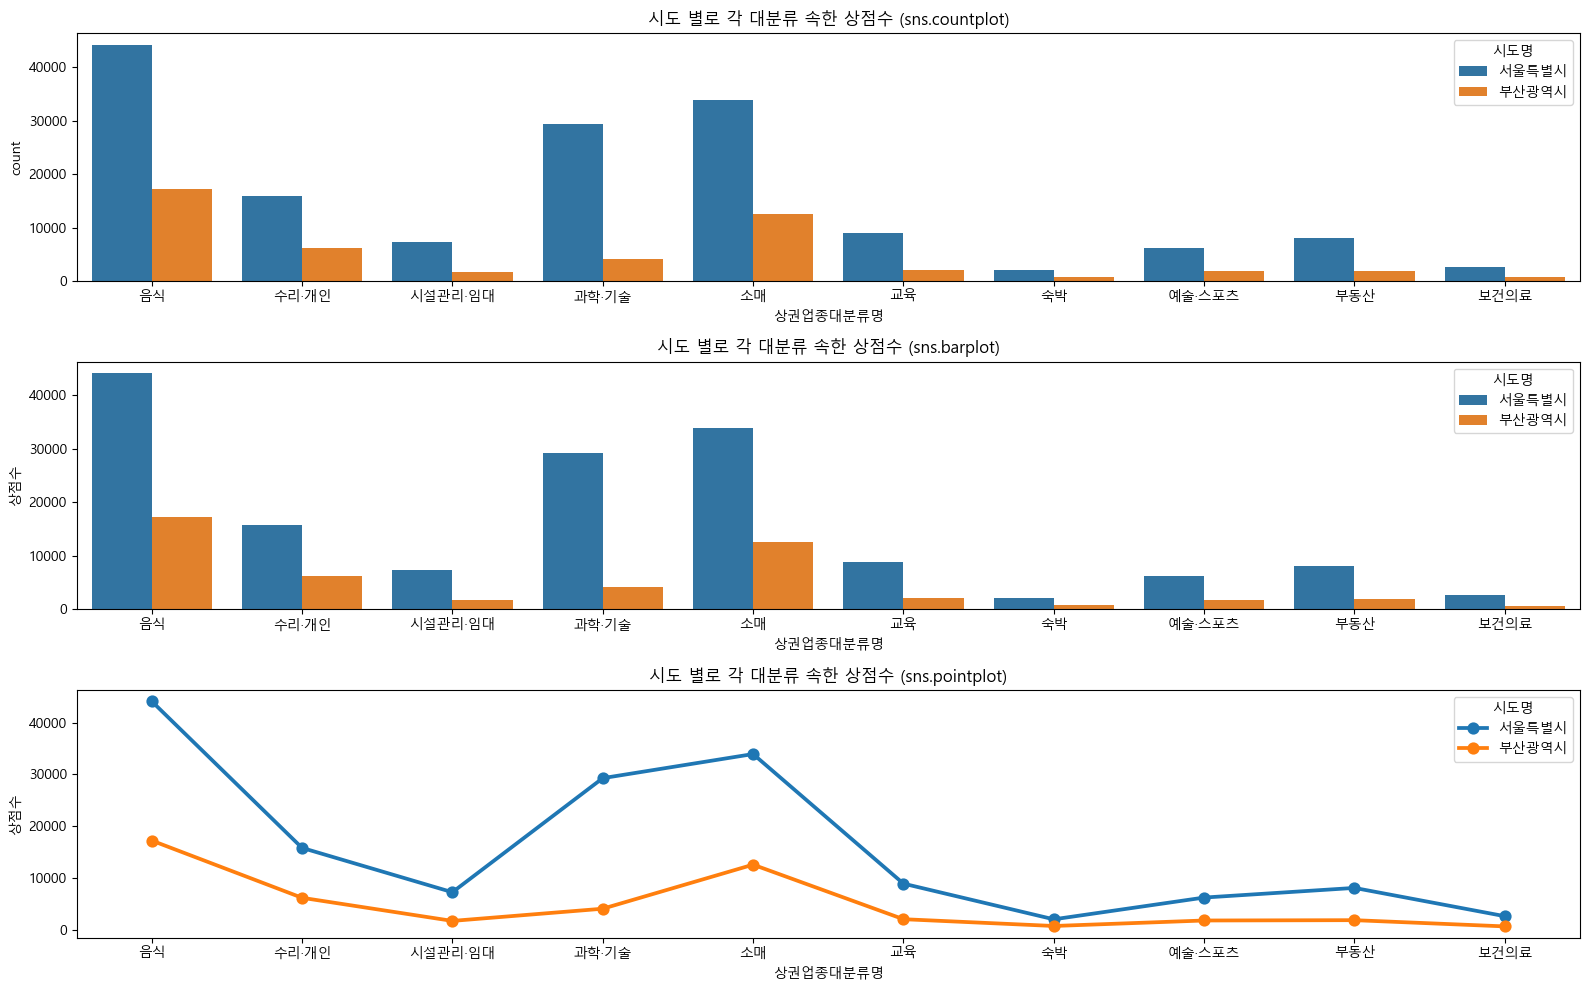

In [33]:
fig=plt.figure(figsize=(16,10),dpi=100)
axs=fig.subplots(3,1).flatten()

axs[0].set_title('시도 별로 각 대분류 속한 상점수 (sns.countplot)')
axs[1].set_title('시도 별로 각 대분류 속한 상점수 (sns.barplot)')
axs[2].set_title('시도 별로 각 대분류 속한 상점수 (sns.pointplot)')

x_tick_order=dfs['상권업종대분류명'].unique()

# ax0
# 코드작성
_=sns.countplot(data=dfs, x='상권업종대분류명', hue='시도명', ax=axs[0], order=x_tick_order)
# ax1
# 코드작성
sr1=dfs[['상권업종대분류명','시도명']].value_counts()
sr1.name='상점수'
df1=sr1.reset_index()
df1
_=sns.barplot(data=df1, x='상권업종대분류명', y='상점수', hue='시도명', ax=axs[1], order=x_tick_order)
# ax2
# 코드작성
_=sns.pointplot(data=df1, x='상권업종대분류명', y='상점수', hue='시도명', ax=axs[2], order=x_tick_order)
fig.tight_layout()

# (실습6-1) 부산광역시의 시군구별로 각 대분류 속한 상점수 시각화

<Axes: title={'center': '부산광역시의 시군구별로 각 대분류 속한 상점수 시각화 (countplot)'}, xlabel='시군구명', ylabel='count'>

Text(0, 0.5, '상점수')

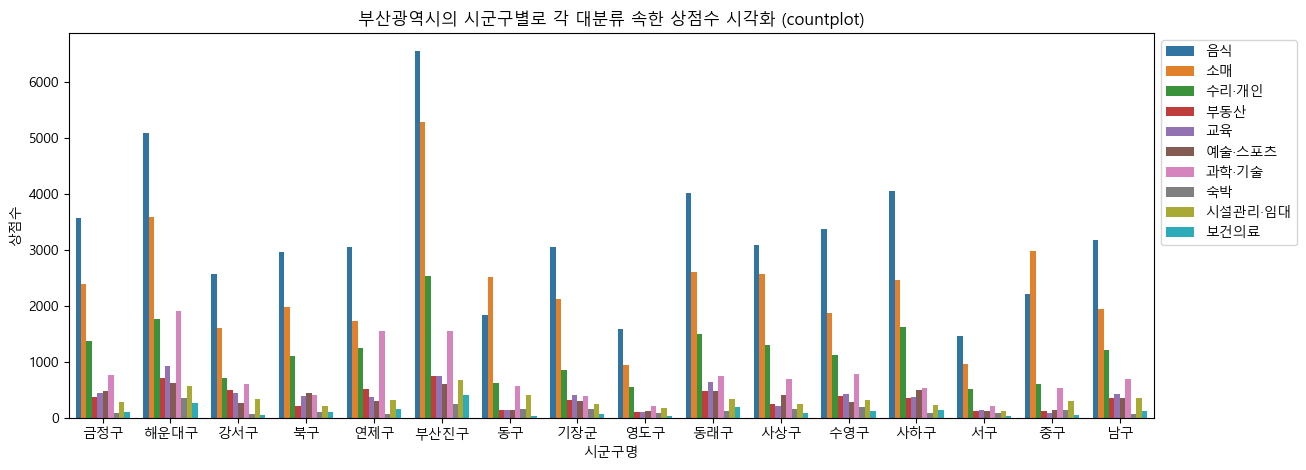

In [30]:
df_busan=dfs.loc[dfs['시도명']=='부산광역시']

fig=plt.figure(figsize=(14,5),dpi=100)
ax=fig.subplots()

_=ax.set_title('부산광역시의 시군구별로 각 대분류 속한 상점수 시각화 (countplot)')
# 코드작성

# (실습6-2) 부산광역시의 시군구별로 각 대분류 속한 상점수 시각화 (각 시군구를 하나의 axes에 plot)

16

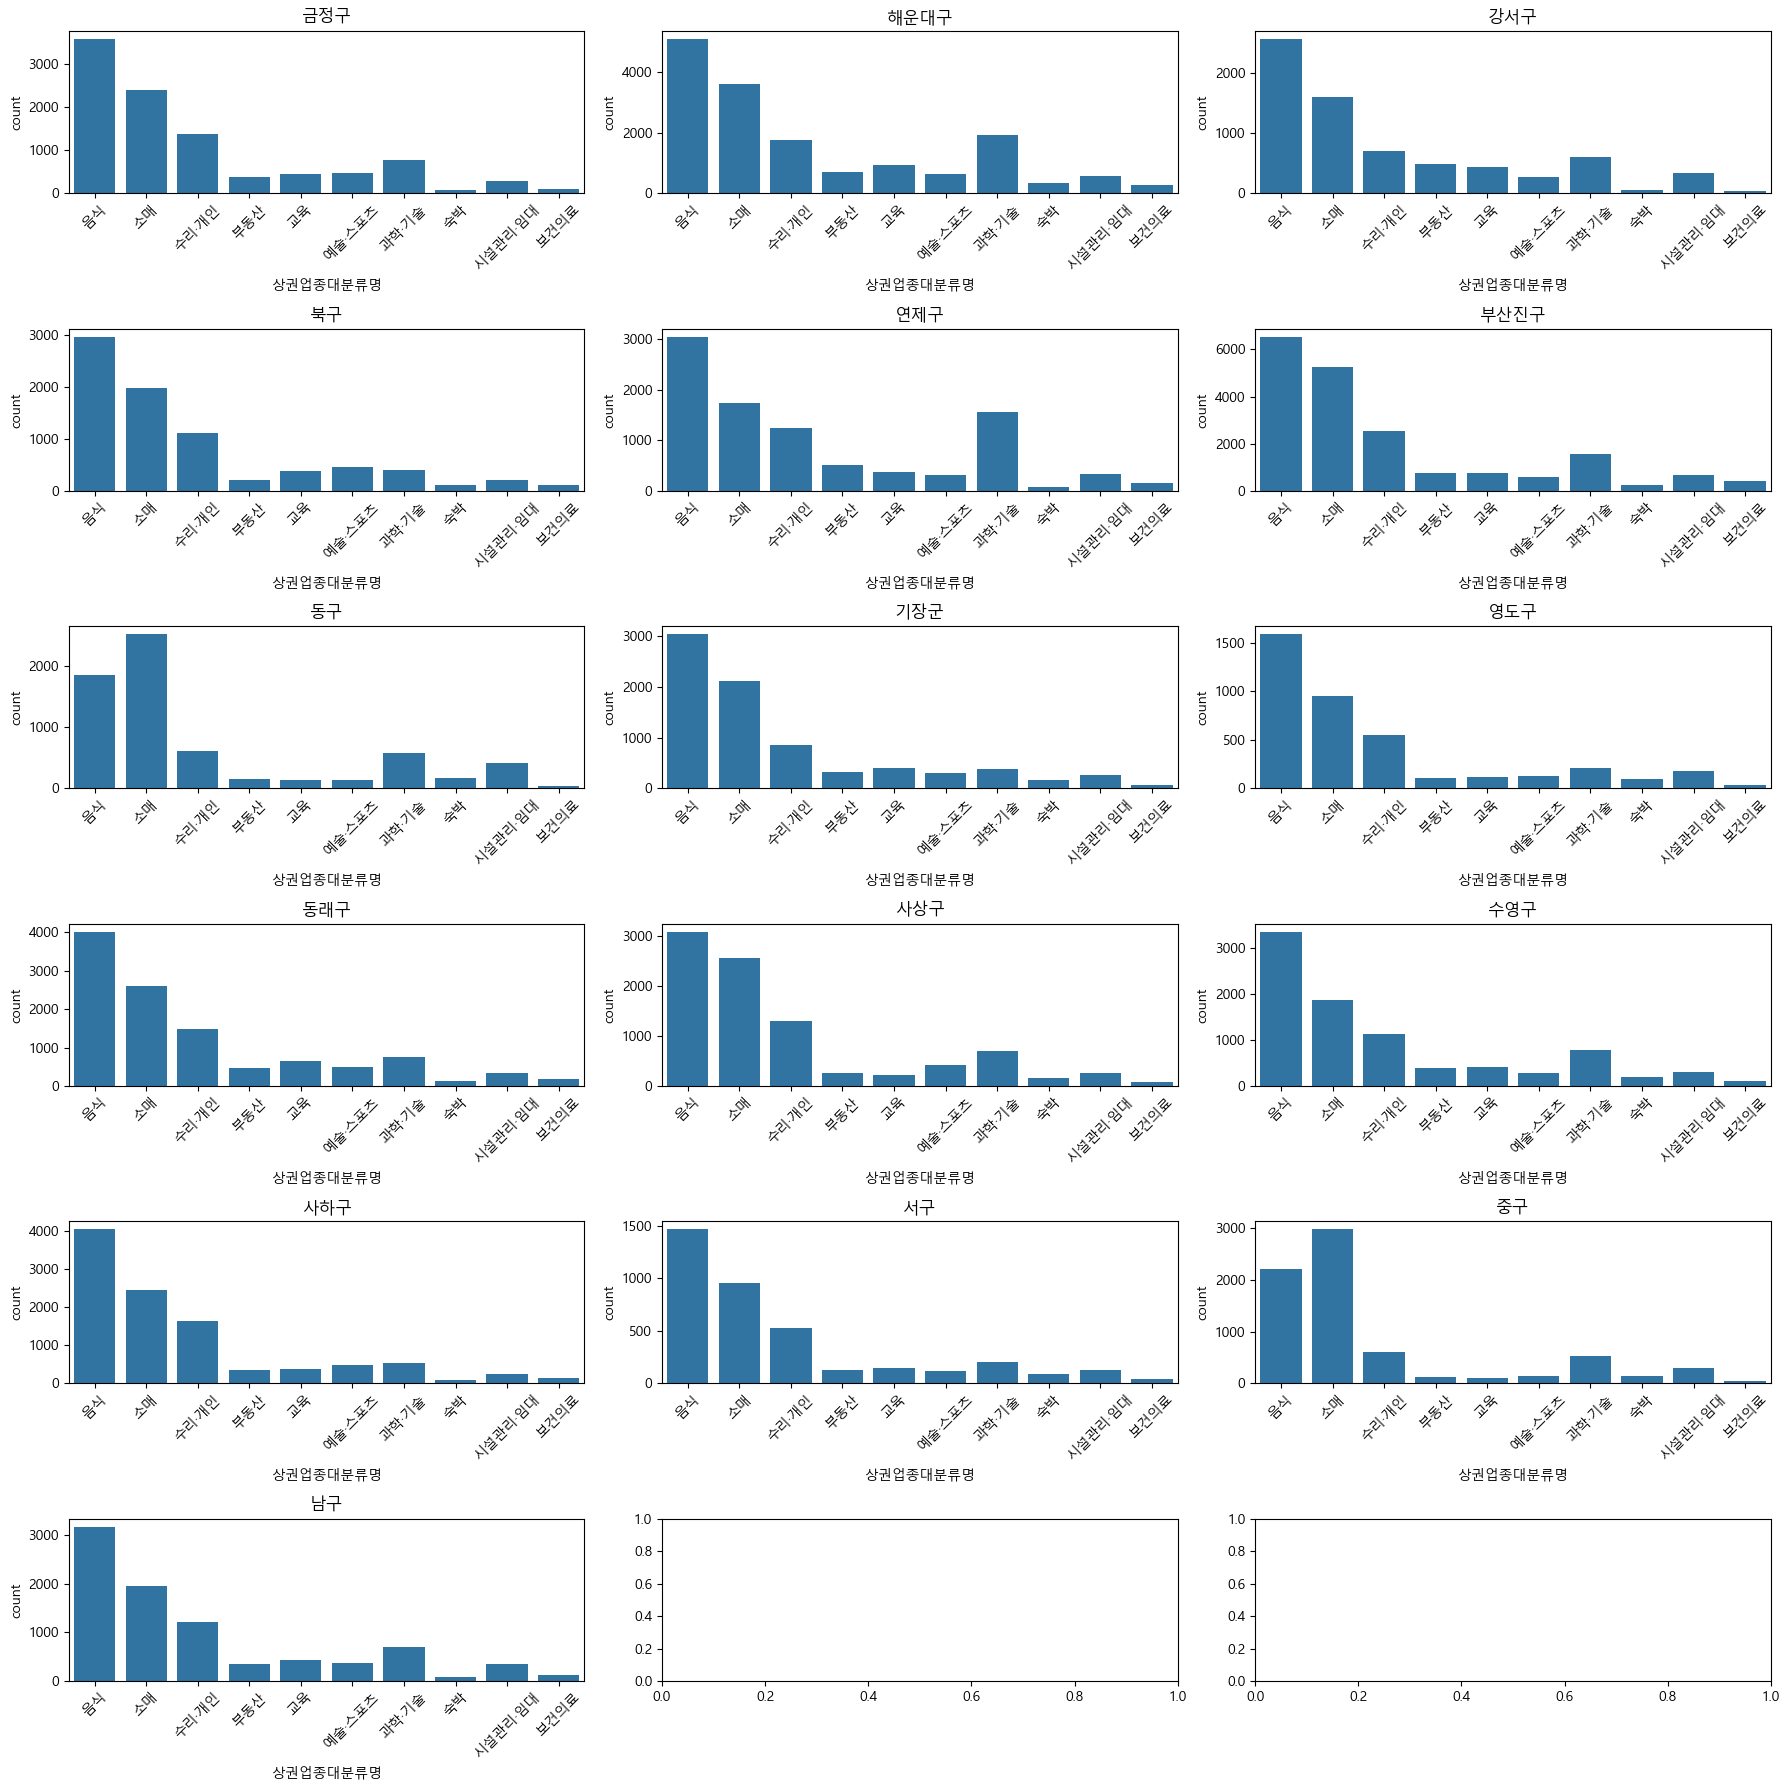

In [33]:
df_busan=dfs.loc[dfs['시도명']=='부산광역시'] # 서울특별시

x_tick_order=dfs['상권업종대분류명'].unique()
all_gu=df_busan['시군구명'].unique()
len(all_gu)

fig=plt.figure(figsize=(18,18),dpi=100)
axs=fig.subplots(6,3).flatten()


for ax1, gu, ii in zip(axs, all_gu, range(len(all_gu))):
    # 코드작성

fig.tight_layout()

# === 실습풀이

## (실습1) 결측치 개수 bargraph로 나타내기
* 각 column 별 결측치의 %를 bar graph로 나타내시오
* ax1) pandas plot 사용
* as2) seaborn 사용

<Axes: >

<Axes: >

Text(0.5, 0, '(%)')

Text(0.5, 0, '(%)')

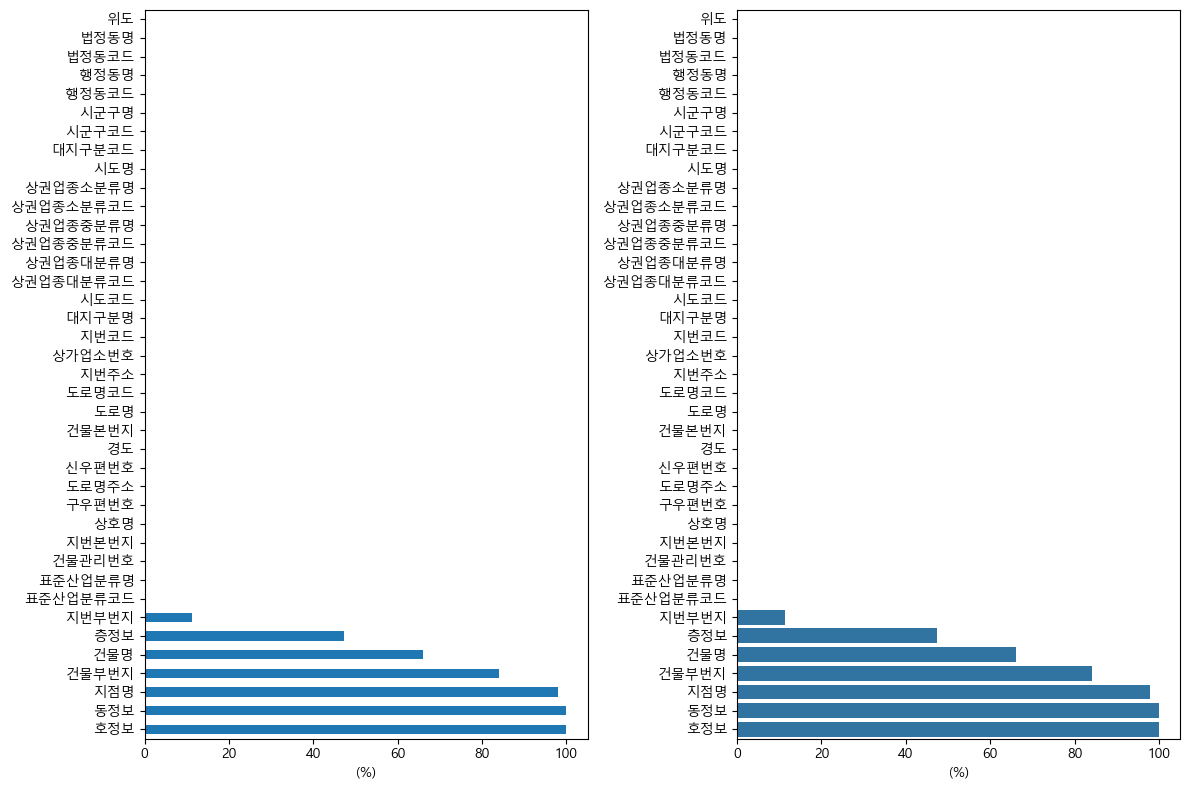

In [20]:
fig=plt.figure(figsize=(12,8), dpi=100)
ax1, ax2=fig.subplots(1,2)

## 코드작성 (ax1)
n1 = df.isnull().sum(axis=0).sort_values(ascending=False)
n2=(n1/len(df))*100
n2.plot.barh(ax=ax1)
## 코드작성 끝


## 코드작성 (ax2)
n2=n2.iloc[::-1]
sns.barplot(data=n2, orient='h', ax=ax2)#seaborn 0.13.x
#sns.barplot(y=n2.index, x=n2.values, orient='h', ax=ax2)#seaborn 0.12.x


## 코드작성 끝

ax1.set_xlabel("(%)")
ax2.set_xlabel("(%)")

fig.tight_layout()

## (실습2) 분석에 사용하지 않은 컬럼 제거
* 1) 결측치가 전체 데이터의 수의 5% 이상인 column 제거
* 2) column이름에 "번호" 또는 "코드"가 포함되어 있는 column 제거 (단 상가업소번호는 포함)

In [31]:
df=pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_부산_202403.csv', sep=',')

print("# 1) 결측치가 전체 데이터의 수의 5% 이상인 column 제거")
## 코드작성 ##
n1 = df.isnull().sum(axis=0).sort_values(ascending=False)
n2=(n1/len(df))*100
n3=n2.loc[n2>5]
n3

not_use_col = n3.index
df2 = df.drop(columns=not_use_col)
## 코드작성 끝 ##
df2.shape


print("# 2) column이름에 '번호' 또는 '코드'가 포함되어 있는 column 제거  (단 상가업소번호는 포함)")
## 코드작성 ##
cols = df2.columns
cols_code = cols[(cols.str.contains("코드|번호"))&(cols!='상가업소번호')]
cols_code
dfs = df2.drop(columns=cols_code)
## 코드작성 끝 ##
dfs.shape

# 1) 결측치가 전체 데이터의 수의 5% 이상인 column 제거


C:\Users\jjmsk\AppData\Local\Temp\ipykernel_20616\1939665267.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_부산_202403.csv', sep=',')


호정보      100.000000
동정보      100.000000
지점명       97.924573
건물부번지     84.129129
건물명       66.074205
층정보       47.335619
지번부번지     11.350691
dtype: float64

(147295, 32)

# 2) column이름에 '번호' 또는 '코드'가 포함되어 있는 column 제거  (단 상가업소번호는 포함)


Index(['상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '표준산업분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

(147295, 18)

## (실습3) 특정 데이터 가져오기

In [8]:
## 데이터 로드 & 전처리

## step1: 결측치가 전체 데이터의 수의 5% 이상인 column 제거
df=pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_부산_202403.csv', sep=',')
n1 = df.isnull().sum(axis=0).sort_values(ascending=False)
n2=(n1/len(df))*100
n3=n2.loc[n2>5]
df2 = df.drop(columns=n3.index)

## step2: column이름에 '번호' 또는 '코드'가 포함되어 있는 column 제거  (단 상가업소번호는 포함)
cols = df2.columns
cols_code = cols[(cols.str.contains("코드|번호"))&(cols!='상가업소번호')]
dfs = df2.drop(columns=cols_code)

## data 확인
dfs.head(3)
dfs.shape

C:\Users\jmjun\AppData\Local\Temp\ipykernel_35692\2100220033.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_부산_202403.csv', sep=',')


,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,MA0101202210A0072343,선해횟집,음식,한식,횟집,한식 일반 음식점업,부산광역시,금정구,금사회동동,금사동,대지,30.0,부산광역시 금정구 금사동 30-27,부산광역시 금정구 사천로3번길,2,부산광역시 금정구 사천로3번길 2,129.113321,35.223363
1,MA010120220805430802,미즈노,소매,섬유·의복·신발 소매,기타 의류 소매업,기타 의복 소매업,부산광역시,해운대구,우2동,우동,대지,1496.0,부산광역시 해운대구 우동 1496,부산광역시 해운대구 센텀남대로,59,부산광역시 해운대구 센텀남대로 59,129.131099,35.169873
2,MA010120220805430814,리스트,소매,섬유·의복·신발 소매,여성 의류 소매업,여자용 겉옷 소매업,부산광역시,강서구,명지1동,명지동,대지,3438.0,부산광역시 강서구 명지동 3438,부산광역시 강서구 명지국제6로,168,부산광역시 강서구 명지국제6로 168,128.918174,35.093125


(147295, 18)

In [51]:
print("# 1) 상호명, 시도명, 시군구명, 도로명주소 정보만 가져오기")
#=== 코드작성 ===#
df4=dfs[['상호명','시도명','시군구명','도로명주소']]
#=== 코드작성 끝 ===#
df4

# 1) 상호명, 시도명, 시군구명, 도로명주소 정보만 가져오기


,상호명,시도명,시군구명,도로명주소
0,선해횟집,부산광역시,금정구,부산광역시 금정구 사천로3번길 2
1,미즈노,부산광역시,해운대구,부산광역시 해운대구 센텀남대로 59
2,리스트,부산광역시,강서구,부산광역시 강서구 명지국제6로 168
3,눈썹그리기교실동안눈썹,부산광역시,북구,부산광역시 북구 화명대로 31
4,안심공인중개사무소,부산광역시,연제구,부산광역시 연제구 연안로13번길 85
...,...,...,...,...
147290,용공장,부산광역시,기장군,부산광역시 기장군 기장읍 차성로390번길 23
147291,유미노래방,부산광역시,금정구,부산광역시 금정구 서동로176번길 14-2
147292,큰집밀양순대돼지국밥,부산광역시,동구,부산광역시 동구 중앙대로231번길 5
147293,바르미부산,부산광역시,부산진구,부산광역시 부산진구 가야대로 772


In [52]:
print("# 2) 상호명이 '프로포즈'인 상점 가져오기")
#=== 코드작성 ===#
df4=dfs.loc[(dfs['상호명']=='프로포즈')]
#=== 코드작성 끝 ===#
df4

# 2) 상호명이 '프로포즈'인 상점 가져오기


,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
39515,MA010120220810602371,프로포즈,소매,시계·귀금속 소매,시계/귀금속 소매업,시계 및 귀금속 소매업,부산광역시,부산진구,부전2동,부전동,대지,573.0,부산광역시 부산진구 부전동 573-1,부산광역시 부산진구 중앙대로,717,부산광역시 부산진구 중앙대로 717,129.059161,35.155254
56821,MA010120220810794879,프로포즈,수리·개인,이용·미용,미용실,두발 미용업,부산광역시,동래구,명장2동,명장동,대지,506.0,부산광역시 동래구 명장동 506-9,부산광역시 동래구 명서로130번길,1,부산광역시 동래구 명서로130번길 1-1,129.101047,35.210820
59291,MA010120220810727357,프로포즈,소매,시계·귀금속 소매,시계/귀금속 소매업,시계 및 귀금속 소매업,부산광역시,금정구,장전2동,장전동,대지,643.0,부산광역시 금정구 장전동 643-89,부산광역시 금정구 금정로60번길,48,부산광역시 금정구 금정로60번길 48,129.088959,35.229219
117293,MA010120220803864266,프로포즈,음식,주점,생맥주 전문,생맥주 전문점,부산광역시,동래구,안락1동,안락동,대지,426.0,부산광역시 동래구 안락동 426-40,부산광역시 동래구 반송로,232,부산광역시 동래구 반송로 232,129.098733,35.201287


In [53]:
print("# 3) 시군구명이 '해운대구'이고 상호명이 '아가방'인 상점 가져오기")
#=== 코드작성 ===#
df4=dfs.loc[(dfs['상호명']=='아가방')&(dfs['시군구명']=='해운대구')]
#=== 코드작성 끝 ===#
df4

# 3) 시군구명이 '해운대구'이고 상호명이 '아가방'인 상점 가져오기


,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
85380,MA010120220812388828,아가방,소매,섬유·의복·신발 소매,기타 의류 소매업,속옷 및 잠옷 소매업,부산광역시,해운대구,좌1동,좌동,대지,1467.0,부산광역시 해운대구 좌동 1467-4,부산광역시 해운대구 해운대로,813,부산광역시 해운대구 해운대로 813,129.177094,35.170597


# 4) 위도 histogram을 그리고, 위도 '35.07' 이하인 상점들이 속해있는 시군구명의 개수를 출력하시오


<Axes: ylabel='Frequency'>

사하구    1713
영도구     259
강서구     203
서구       67
Name: 시군구명, dtype: int64

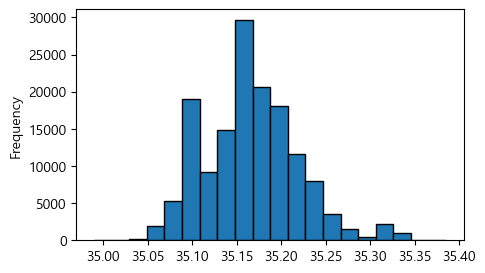

In [54]:
print("# 4) 위도 histogram을 그리고, 위도 '35.07' 이하인 상점들이 속해있는 시군구명의 개수를 출력하시오")

fig=plt.figure(figsize=(5,3), dpi=100)
ax1=fig.subplots()

#=== 코드작성 ===#
dfs['위도'].plot.hist(ax=ax1, bins=20, edgecolor='k')
df4=dfs.loc[(dfs['위도']<=35.07)]
df4['시군구명'].value_counts()
#=== 코드작성 끝 ===#

In [29]:
print("# 5) 가장 동쪽에 있는 '상호명', '시도명', '경도' 가져오기")

#=== 코드작성 ===#
max_long=dfs['경도'].max()
max_long

sr1=dfs.loc[dfs['경도']==max_long,['상호명', '시도명', '경도']]
#=== 코드작성 끝 ===#

sr1

# 5) 가장 동쪽에 있는 '상호명', '시도명', '경도' 가져오기


129.294090409964

,상호명,시도명,경도
4887,1발전소매점,부산광역시,129.29409
74976,한전케이피에스고리3사업소,부산광역시,129.29409


In [56]:
print("# 6) 해운대구의 상점 중, 상호명에 '태권도'가 포함되어있는 상점들의 (상호명) 정보 가져오기")

# ++++++++ contains결과를 boolean index로 사용시 nan 유의

#=== 코드작성 ===#
sr6=dfs.loc[(dfs['시군구명']=='해운대구')&(dfs['상호명'].str.contains('태권도')), '상호명']
sr6
#=== 코드작성 끝 #

# 6) 해운대구의 상점 중, 상호명에 '태권도'가 포함되어있는 상점들의 (상호명) 정보 가져오기


27246         부산TIA태권도
88640          마스터홍태권도
94045           사자후태권도
96546          자이언트태권도
111350      아리랑멋제일태권도장
142752    TOPCLASS태권도2
144377        베스트성빈태권도
Name: 상호명, dtype: object

## (실습4) 부산에는 어떤 종류의 상점이 제일 많을까? bargraph로 나타내시오

In [4]:
## 데이터 로드 & 전처리

## step1: 결측치가 전체 데이터의 수의 5% 이상인 column 제거
df=pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_부산_202403.csv', sep=',')
n1 = df.isnull().sum(axis=0).sort_values(ascending=False)
n2=(n1/len(df))*100
n3=n2.loc[n2>5]
df2 = df.drop(columns=n3.index)

## step2: column이름에 '번호' 또는 '코드'가 포함되어 있는 column 제거  (단 상가업소번호는 포함)
cols = df2.columns
cols_code = cols[(cols.str.contains("코드|번호"))&(cols!='상가업소번호')]
dfs = df2.drop(columns=cols_code)

## data 확인
dfs.shape

C:\Users\jjmsk\AppData\Local\Temp\ipykernel_43184\1742466000.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_부산_202403.csv', sep=',')


(147295, 18)

* ax1) 상점수가 가장 많은 대분류 Top5의 상점수 bar graph
* ax2) 상점수가 가장 많은 중분류 Top5의 상점수 bar graph
* ax3) 상점수가 가장 많은 소분류 Top5의 상점수 bar graph (sns.countplot 사용)
* ax4) 각 대분류 별 중분류 가짓수 (상점수가 아님) 를 bar로 시각화 (중분류 리스트를 담은 series는 따로 출력) 
* ax5) 각 대분류 별 상점수가 가장 많은 중분류 Top3의 상점수 bar grapth

'###################### ax1'

상권업종대분류명
음식         51691
소매         37562
수리·개인      18681
과학·기술      12191
교육          6329
부동산         5752
예술·스포츠      5621
시설관리·임대     5209
숙박          2241
보건의료        2017
Name: 상호명, dtype: int64

'###################### ax2'

상권업종중분류명
한식                  음식
섬유·의복·신발 소매         소매
이용·미용            수리·개인
부동산 서비스            부동산
의약·화장품 소매           소매
                ...   
통신장비 수리          수리·개인
모터사이클 소매            소매
기타 개인            수리·개인
조경·유지          시설관리·임대
시장 조사            과학·기술
Name: 상권업종대분류명, Length: 74, dtype: object

'###################### ax3'

'###################### ax4'

상권업종대분류명
과학·기술      12191
교육          6329
보건의료        2017
부동산         5752
소매         37563
수리·개인      18681
숙박          2241
시설관리·임대     5209
예술·스포츠      5621
음식         51691
Name: 상권업종중분류명, dtype: int64

상권업종대분류명
소매         21
과학·기술      11
수리·개인      11
시설관리·임대    10
음식          9
교육          3
보건의료        3
예술·스포츠      3
숙박          2
부동산         1
Name: 상권업종중분류명, dtype: int64

상권업종대분류명
과학·기술      [광고, 본사·경영 컨설팅, 전문 디자인, 회계·세무, 기술 서비스, 인쇄·제품제작...
교육                                     [기타 교육, 일반 교육, 교육 지원]
보건의료                                         [의원, 기타 보건, 병원]
부동산                                                [부동산 서비스]
소매         [섬유·의복·신발 소매, 의약·화장품 소매, 가전·통신 소매, 식물 소매, 담배 소...
수리·개인      [이용·미용, 컴퓨터 수리, 기타 가정용품 수리, 세탁, 자동차 수리·세차, 욕탕·...
숙박                                            [일반 숙박, 기타 숙박]
시설관리·임대    [기타 사업 서비스, 여행사·보조, 청소·방제, 산업용품 대여, 고용 알선, 시설관...
예술·스포츠                            [유원지·오락, 스포츠 서비스, 도서관·사적지]
음식         [한식, 기타 간이, 중식, 일식, 비알코올 , 구내식당·뷔페, 주점, 서양식, 동...
Name: 상권업종중분류명, dtype: object

'###################### ax5'

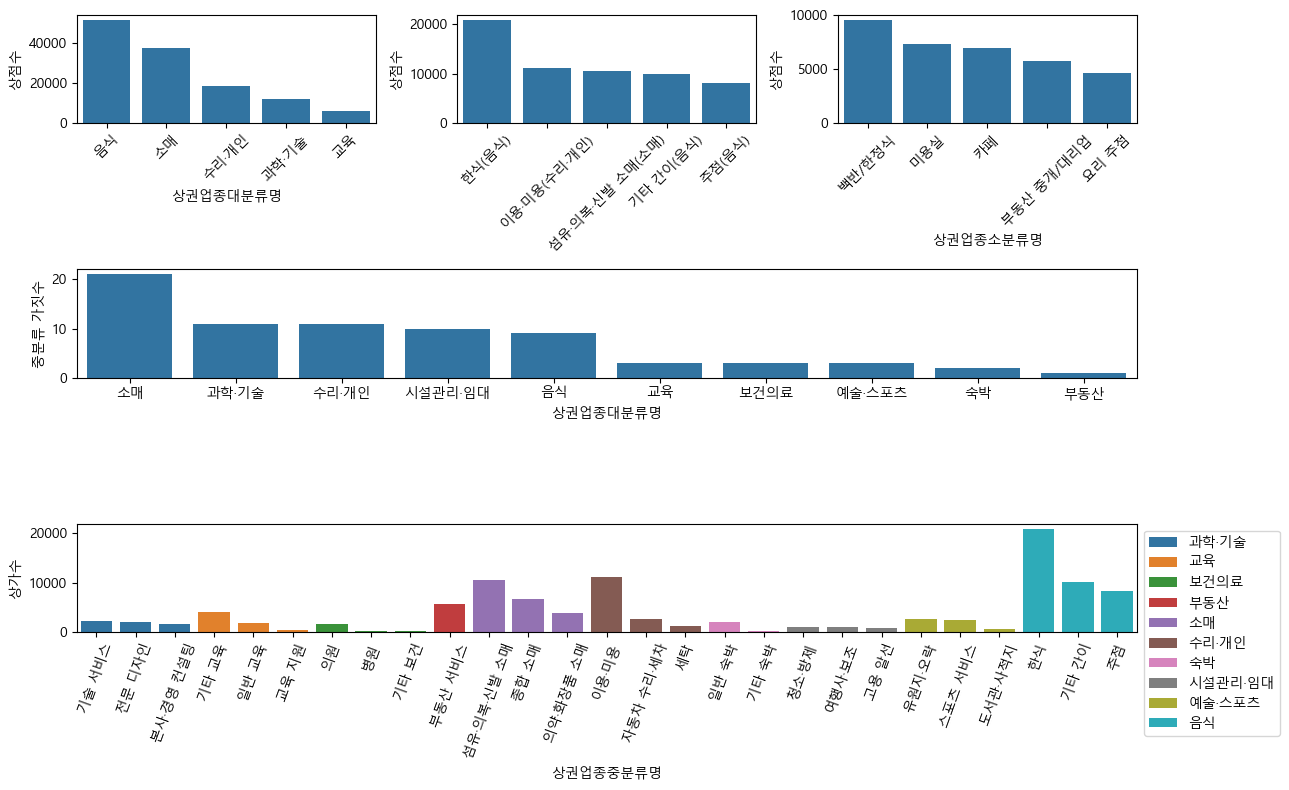

In [23]:
###################################
fig=plt.figure(figsize=(13,8), dpi=100)
ax1=fig.add_subplot(3,3,1)
ax2=fig.add_subplot(3,3,2)
ax3=fig.add_subplot(3,3,3)
ax4=fig.add_subplot(3,3,(4,6))
ax5=fig.add_subplot(3,3,(7,9))

## ax1
'###################### ax1'
sr1=dfs['상권업종대분류명'].value_counts() # 방법 1: value_counts (sorting 됨)
#sr1
sr1=dfs.groupby(['상권업종대분류명'])['상호명'].count().sort_values(ascending=False) # 방법 2: groupby (sorting 따로 해야 함)
#sr1
sr1=dfs.pivot_table(index='상권업종대분류명', values='상호명', aggfunc='count').sort_values(by='상호명',ascending=False) # 방법 3: pivot_table (sorting 따로 해야 함)
sr1=sr1['상호명']
sr1

_=sns.barplot(sr1.head(5), ax=ax1)
_=ax1.tick_params(axis='x', rotation=45)
_=ax1.set_ylabel('상점수')
## ax2
'###################### ax2'
sr2=dfs['상권업종중분류명'].value_counts() # 방법 1: value_counts (sorting 됨)
name_dic_sr=dfs[['상권업종대분류명','상권업종중분류명']].drop_duplicates().set_index('상권업종중분류명')['상권업종대분류명']
name_dic_sr
sr2_top5=sr2.head(5)
sr2_top5.index=['{}({})'.format(n1,name_dic_sr[n1]) for n1 in sr2_top5.index]
#sr2

_=sns.barplot(sr2_top5, ax=ax2)
_=ax2.tick_params(axis='x', rotation=45)
_=ax2.set_ylabel('상점수')

## ax3 (sns countplot 사용)
'###################### ax3'
_=sns.countplot(data=dfs,
                x='상권업종소분류명',
                ax=ax3,
                order=dfs['상권업종소분류명'].value_counts().iloc[:5].index) # sorting 안 됨. sorting 원할 시 order 사용

_=ax3.tick_params(axis='x', rotation=45)
_=ax3.set_ylabel('상점수')
## ax4
'###################### ax4'
dfs.groupby('상권업종대분류명')['상권업종중분류명'].count() # 중복 제거 안됨
sr4=dfs.groupby('상권업종대분류명')['상권업종중분류명'].nunique().sort_values(ascending=False)
sr4
sr5=dfs.groupby('상권업종대분류명')['상권업종중분류명'].unique()
sr5
_=sns.barplot(sr4, ax=ax4)
_=ax4.set_ylabel('중분류 가짓수')

## ax5
'###################### ax5'
df1=dfs.groupby(['상권업종대분류명','상권업종중분류명'])['상가업소번호'].nunique().reset_index()
df1.rename(columns={'상가업소번호': '상가수'}, inplace=True)
df2=df1.sort_values(['상권업종대분류명', '상가수'], ascending=[True, False])
df3=df2.groupby('상권업종대분류명').head(3)
_=sns.barplot(data=df3, x='상권업종중분류명',y='상가수',hue='상권업종대분류명', ax=ax5)
_=ax5.tick_params(axis='x', labelrotation=70)
_=ax5.legend(bbox_to_anchor=(1,1), loc='upper left')

fig.tight_layout()

## ===> 서울부산 데이터 로드

In [4]:
## 데이터 로드 & 전처리

df=pd.read_csv('data/상가정보_서울부산_sampled.csv', sep=',') # 원래 데이터에서 1/3 씩 랜덤하게 샘플링함
## step1: 결측치가 전체 데이터의 수의 5% 이상인 column 제거
n1 = df.isnull().sum(axis=0).sort_values(ascending=False)
n2=(n1/len(df))*100
n3=n2.loc[n2>5]
df2 = df.drop(columns=n3.index)

## step2: column이름에 '번호' 또는 '코드'가 포함되어 있는 column 제거  (단 상가업소번호는 포함)
cols = df2.columns
cols_code = cols[(cols.str.contains("코드|번호"))&(cols!='상가업소번호')]
dfs = df2.drop(columns=cols_code)

## data 확인
dfs.head(1)
dfs.shape

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,MA0106202307A0467187,츠키요와,음식,일식,일식 회/초밥,일식 음식점업,서울특별시,강남구,청담동,청담동,대지,83.0,서울특별시 강남구 청담동 83-17,서울특별시 강남구 선릉로158길,13.0,서울특별시 강남구 선릉로158길 13-12,127.041457,37.526122


(207510, 18)

## (실습5) 시도 별로 각 대분류 속한 상점수 시각화

Text(0.5, 1.0, '시도 별로 각 대분류 속한 상점수 (sns.countplot)')

Text(0.5, 1.0, '시도 별로 각 대분류 속한 상점수 (sns.barplot)')

Text(0.5, 1.0, '시도 별로 각 대분류 속한 상점수 (sns.pointplot)')

,상권업종대분류명,시도명,상점수
0,음식,서울특별시,44114
1,소매,서울특별시,33929
2,과학·기술,서울특별시,29281
3,음식,부산광역시,17246
4,수리·개인,서울특별시,15828
5,소매,부산광역시,12592
6,교육,서울특별시,8931
7,부동산,서울특별시,8107
8,시설관리·임대,서울특별시,7275
9,예술·스포츠,서울특별시,6247


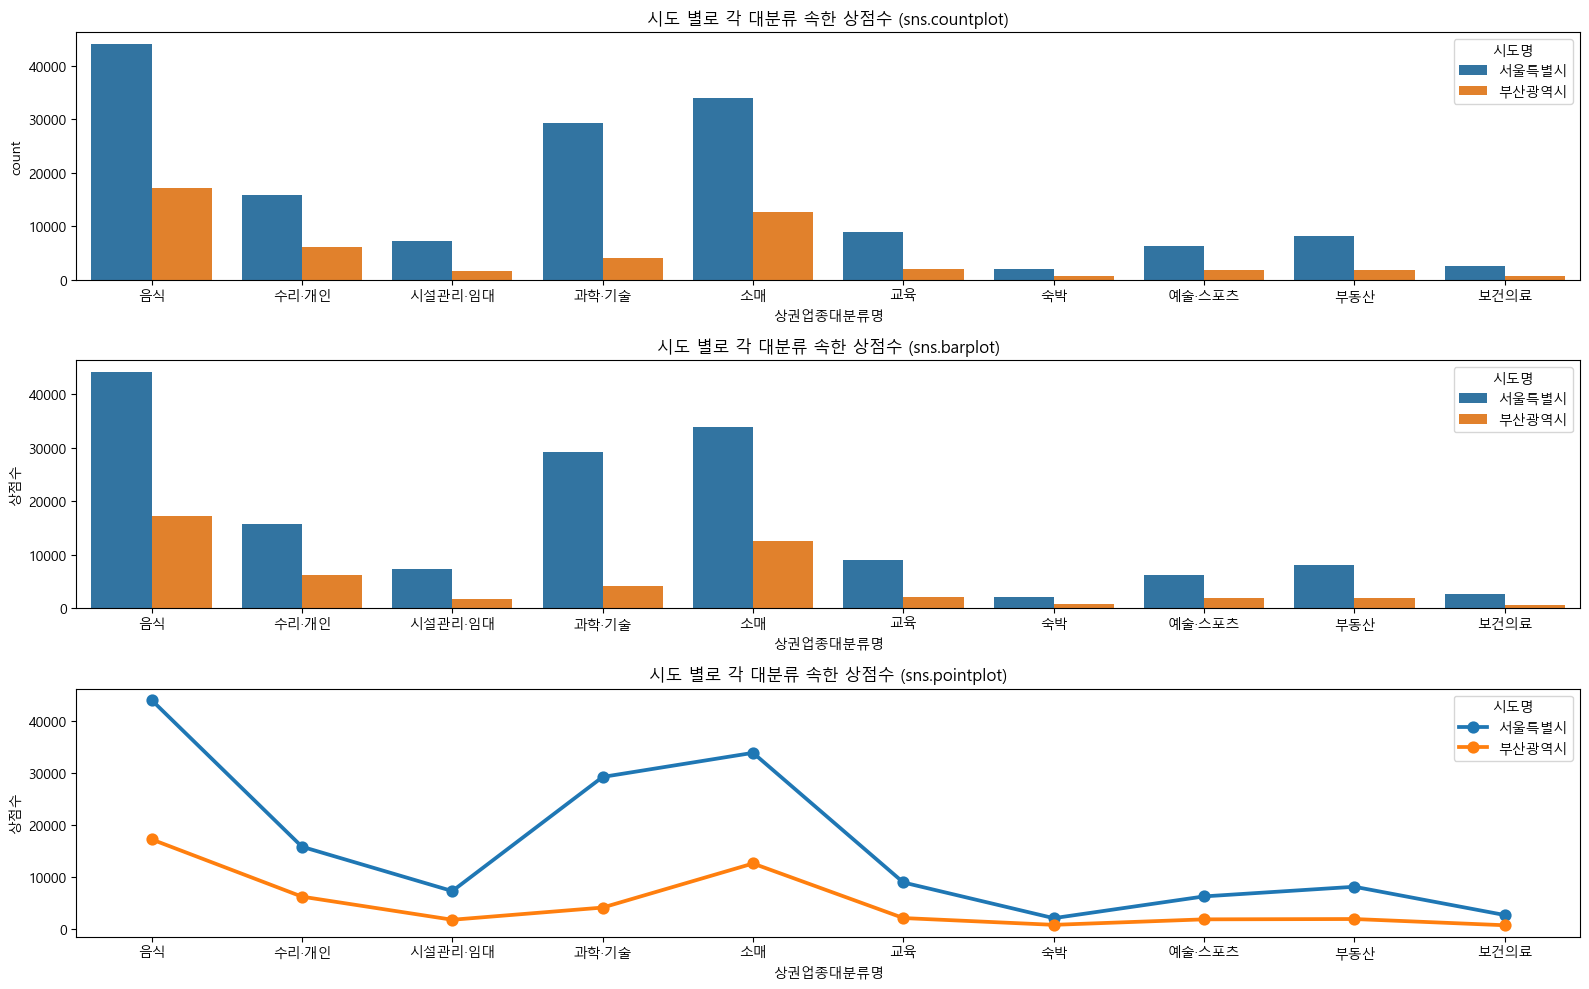

In [3]:
fig=plt.figure(figsize=(16,10),dpi=100)
axs=fig.subplots(3,1).flatten()

axs[0].set_title('시도 별로 각 대분류 속한 상점수 (sns.countplot)')
axs[1].set_title('시도 별로 각 대분류 속한 상점수 (sns.barplot)')
axs[2].set_title('시도 별로 각 대분류 속한 상점수 (sns.pointplot)')

x_tick_order=dfs['상권업종대분류명'].unique()

# ax0
_=sns.countplot(data=dfs, x='상권업종대분류명', hue='시도명', ax=axs[0], order=x_tick_order)

# ax1
sr1=dfs[['상권업종대분류명','시도명']].value_counts()
sr1.name='상점수'
df1=sr1.reset_index()
df1
_=sns.barplot(data=df1, x='상권업종대분류명', y='상점수', hue='시도명', ax=axs[1], order=x_tick_order)

# ax2
_=sns.pointplot(data=df1, x='상권업종대분류명', y='상점수', hue='시도명', ax=axs[2], order=x_tick_order)

fig.tight_layout()

## (실습6-1) 부산광역시의 시군구별로 각 대분류 속한 상점수 시각화

<Axes: title={'center': '부산광역시의 시군구별로 각 대분류 속한 상점수 시각화 (countplot)'}, xlabel='시군구명', ylabel='count'>

Text(0, 0.5, '상점수')

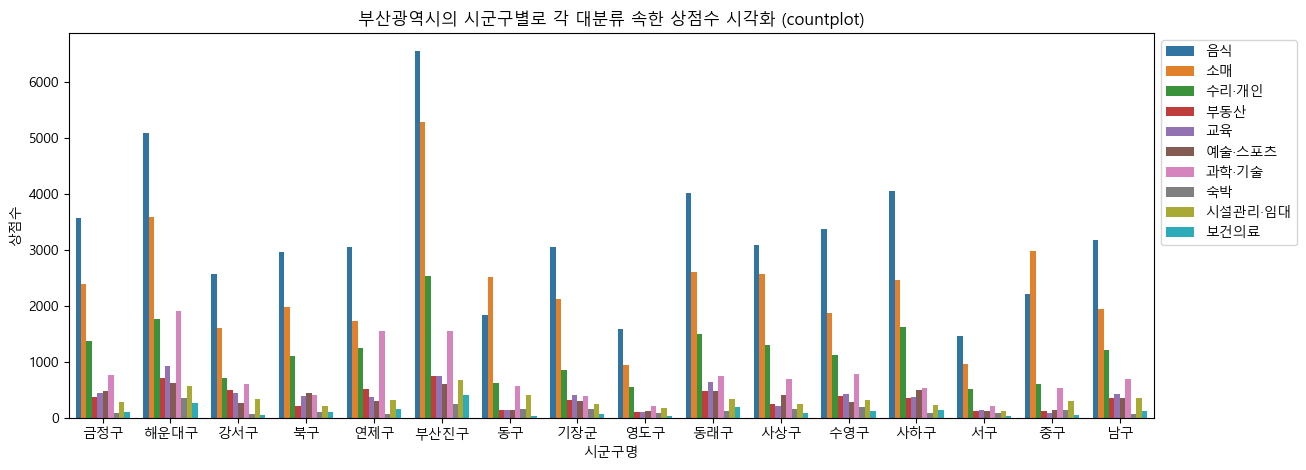

In [30]:
df_busan=dfs.loc[dfs['시도명']=='부산광역시']

fig=plt.figure(figsize=(14,5),dpi=100)
ax=fig.subplots()

_=ax.set_title('부산광역시의 시군구별로 각 대분류 속한 상점수 시각화 (countplot)')
sns.countplot(data=df_busan, x='시군구명', hue='상권업종대분류명', ax=ax)
ax.legend(bbox_to_anchor=(1,1),loc=2)
ax.set_ylabel('상점수')

## (실습6-2) 부산광역시의 시군구별로 각 대분류 속한 상점수 시각화 (각 시군구를 하나의 axes에 plot)

16

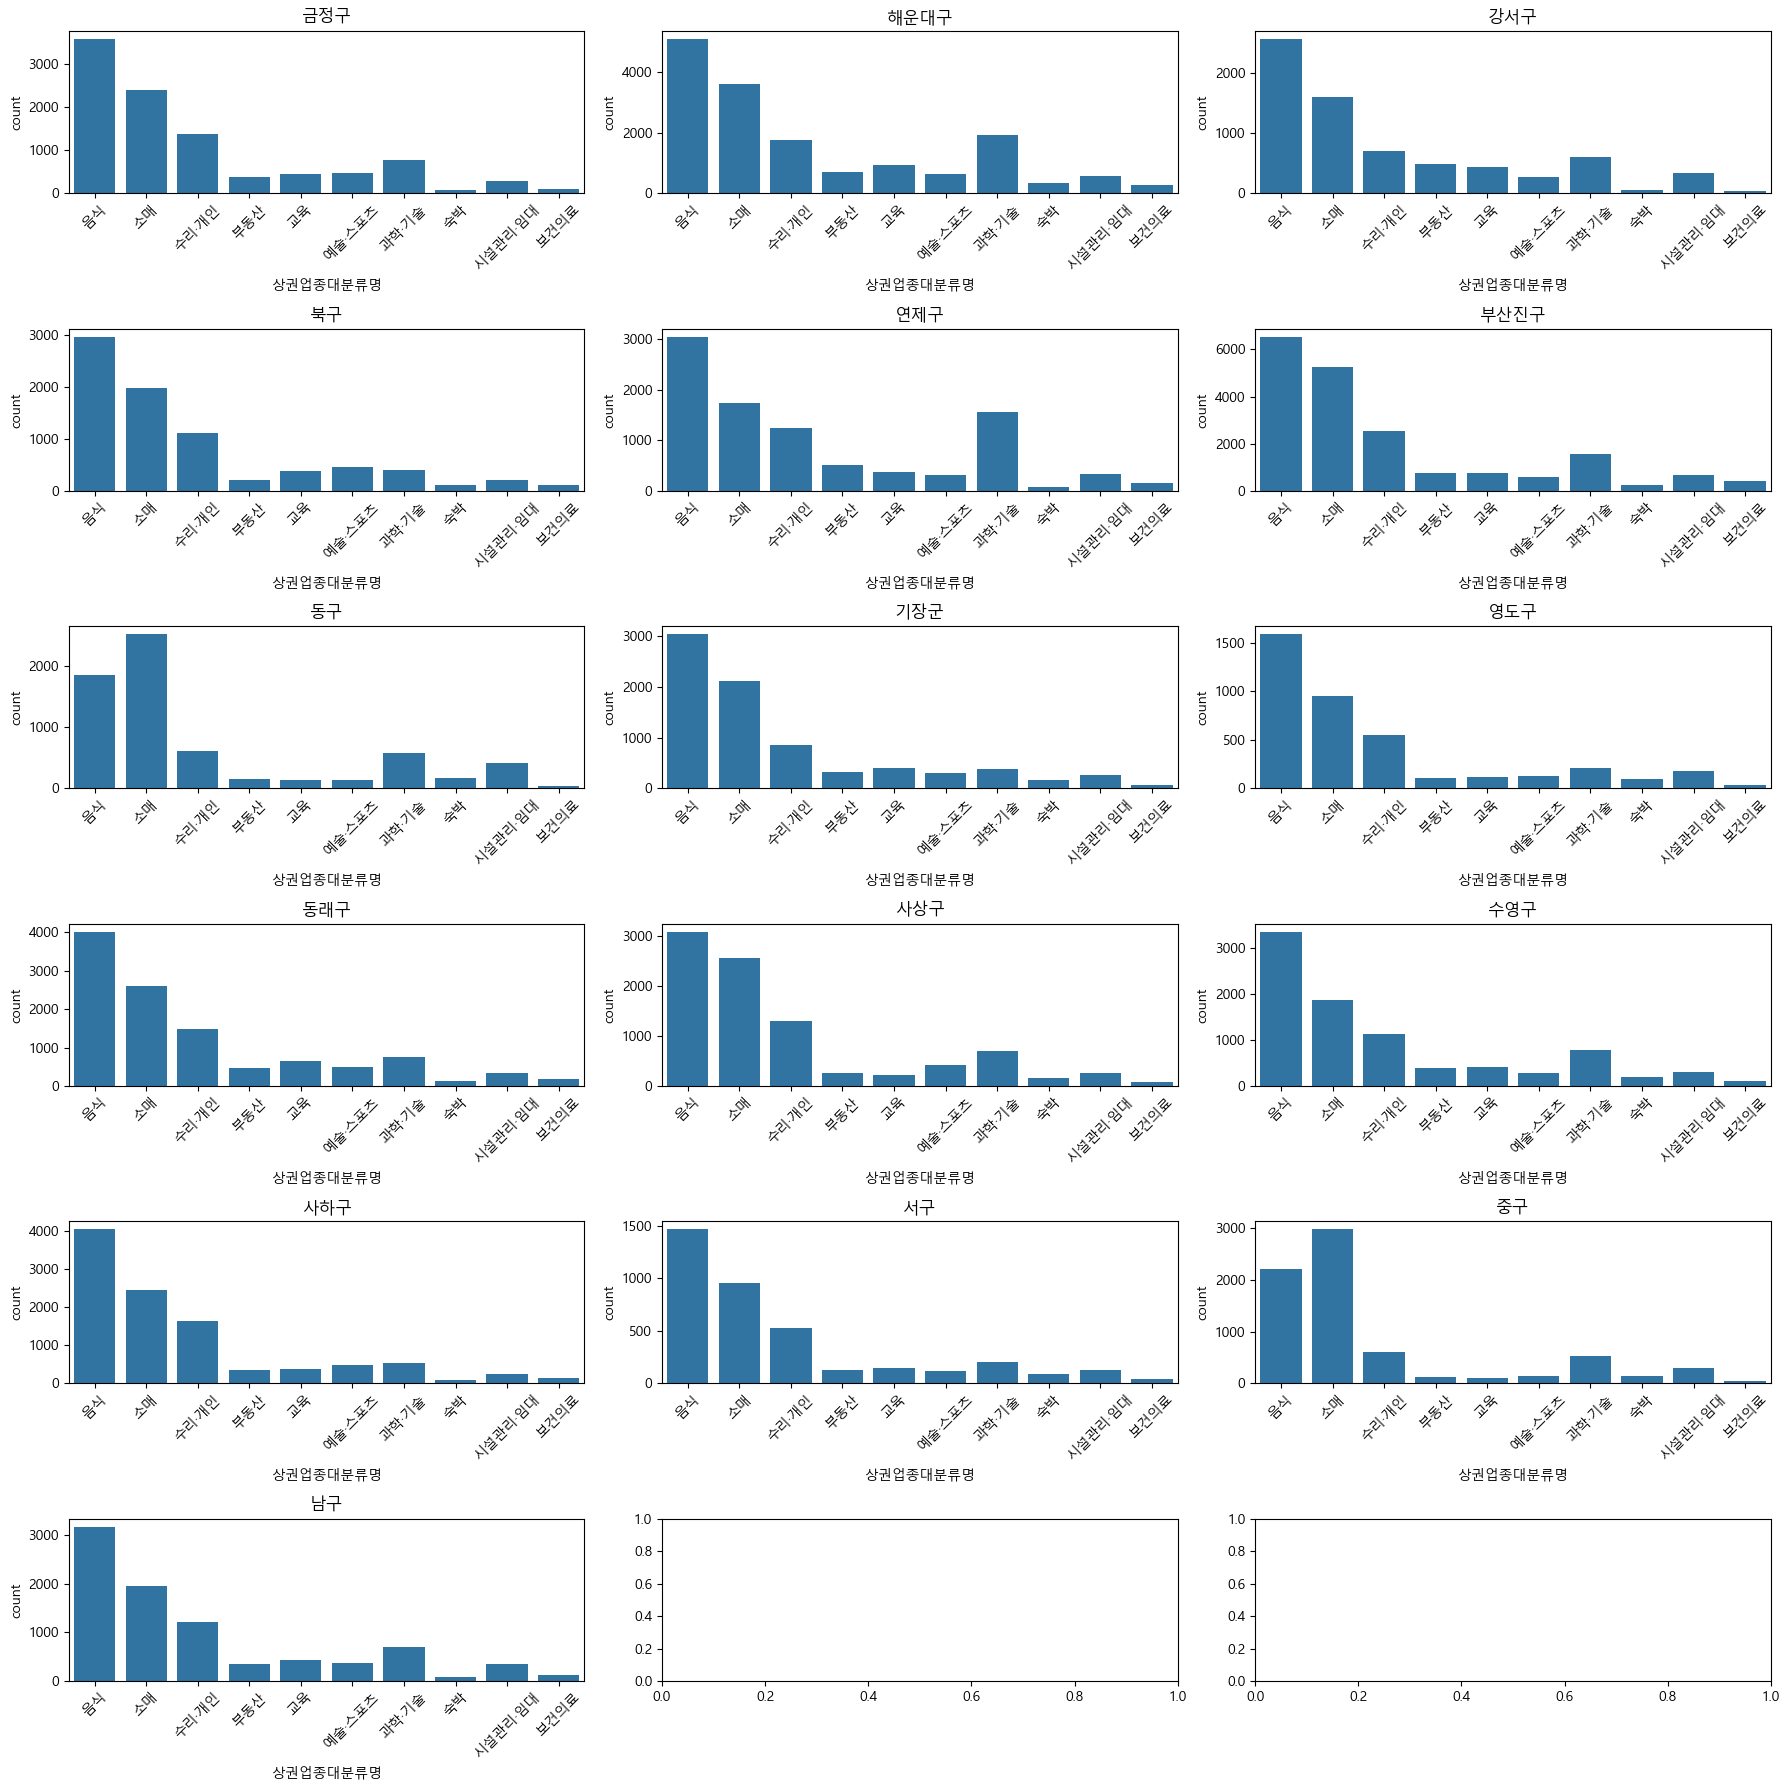

In [33]:
df_busan=dfs.loc[dfs['시도명']=='부산광역시'] # 서울특별시

x_tick_order=dfs['상권업종대분류명'].unique()
all_gu=df_busan['시군구명'].unique()
len(all_gu)

fig=plt.figure(figsize=(18,18),dpi=100)
axs=fig.subplots(6,3).flatten()


for ax1, gu, ii in zip(axs, all_gu, range(len(all_gu))):
    df_gu=df_busan.loc[df_busan['시군구명']==gu]
    _=sns.countplot(data=df_gu, x='상권업종대분류명', ax=ax1, order=x_tick_order)
    
    _=ax1.tick_params(axis='x', labelrotation=45)
    _=ax1.set_title(gu)

fig.tight_layout()